In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import scipy.stats

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (13, 7)

## Exercise 1.01 ##
In this exercise we are required to test a given pseudorandom number generator. The goodness of a pseudorandom number generator is measured by different factors: for example we could test the lack of correlation  of the generated numbers, or the efficiency, but in this instance we will focus exclusively on whether the generated data are distinguishable in any way from a random variable extracted from a pdf $f$:
$$f(x)=\chi_{[0,1]}$$
Where $\chi$ is the characteristic function of an interval.

To do so we start by extracting some numbers and evaluating the sample mean: if the data are extracted from the given pdf the mean should converge to $1/2$. 

In this instance we'll generate $N$ sets of $M$ data, we'll take the sample mean of every single set, and we'll then calculate the sample mean and the sample variance of the block means.
The next two plots are these two quantities as a function of the number of blocks. In this case we have no good reasons to do so, and we do so for purely educational purpose.
It should also be noted that this is a good method to destroy the correlation between our datas, hence we have no way of  testing whether the data from our generator are really uncorrelated.

The next two plots are the means and the variances, calculated as explained in the previous paragraph, as a function of the number of blocks

In [3]:
df=pd.read_csv(".\meanBlocking\meanBlocking.csv")
df.head(10)

,avgs,avgs2,avgErrs,msds,msds2,msdErr
0,0.456646,0.208526,0.000000,0.089040,0.007928,0.000000
1,0.502985,0.255141,0.046338,0.093619,0.008785,0.004579
2,0.476028,0.229488,0.037979,0.087620,0.007763,0.006556
3,0.496012,0.249390,0.033475,0.088946,0.007981,0.004822
4,0.495708,0.248416,0.025931,0.086714,0.007595,0.004351
5,0.492961,0.245290,0.021350,0.085259,0.007343,0.003839
6,0.495493,0.247505,0.018221,0.084046,0.007136,0.003464
7,0.494858,0.246630,0.015792,0.084747,0.007248,0.003081
8,0.501828,0.253772,0.015574,0.083677,0.007070,0.002920
9,0.506394,0.258369,0.014660,0.083451,0.007026,0.002621


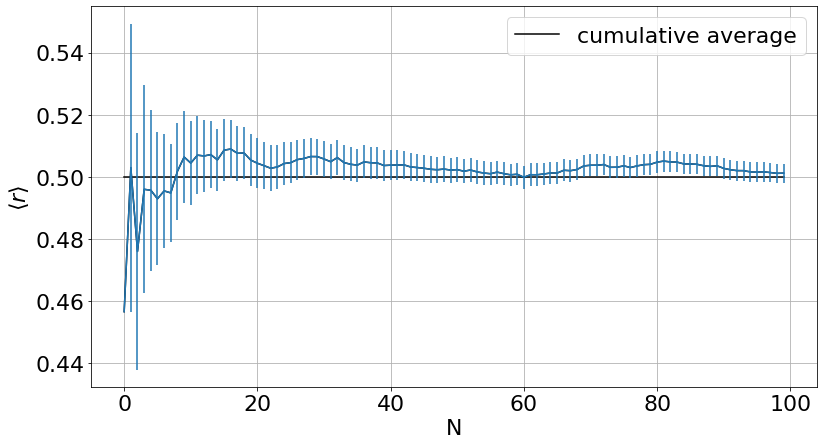

In [6]:
df=pd.read_csv(".\meanBlocking\meanBlocking.csv")
N=df.avgs.size;
plt.plot(df.avgs,color="black", label="cumulative average")
plt.plot(range(N), 0.5*np.ones(N),color="black")
plt.errorbar(x=range(N), y=df.avgs, yerr=df.avgErrs);
plt.xlabel("N");
plt.ylabel(r"$\langle r\rangle$");
plt.grid()
plt.legend();

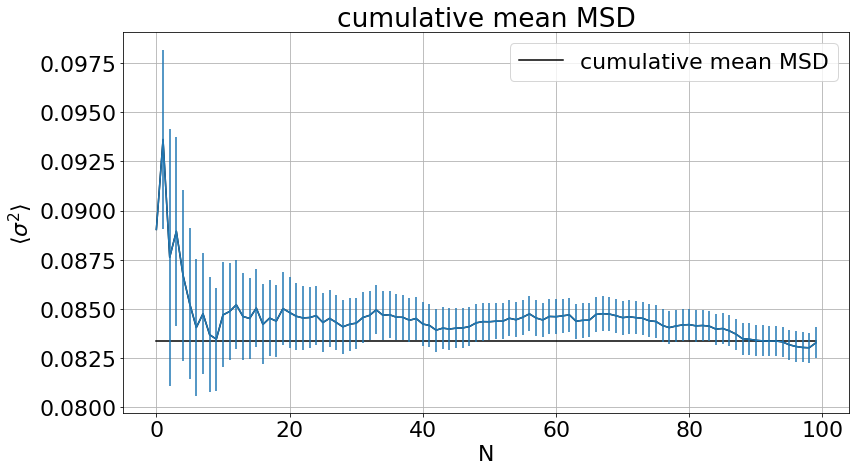

In [11]:
N=df.msds.size;
plt.plot(df.msds,color="black", label="cumulative mean MSD")
plt.plot(range(N), np.ones(N)/12,color="black")
plt.errorbar(x=range(N), y=df.msds, yerr=df.msdErr);
plt.xlabel("N");
plt.ylabel(r"$\langle \sigma^2\rangle$");
plt.title("cumulative mean MSD");
plt.grid()
plt.legend();

The most known statistical test used to determine if a set of number is sampled from a given distribution is the chi squared test, and we therefore want to evaluate the chi square statistics for our samples

In [12]:
df=pd.read_csv(".\chiSquareTest\chiSquaredStatistics.csv")
df.head(10)

,chiSquaredStatistics
0,82.3
1,116.5
2,91.0
3,97.0
4,116.3
5,99.5
6,131.5
7,103.6
8,114.8
9,134.0


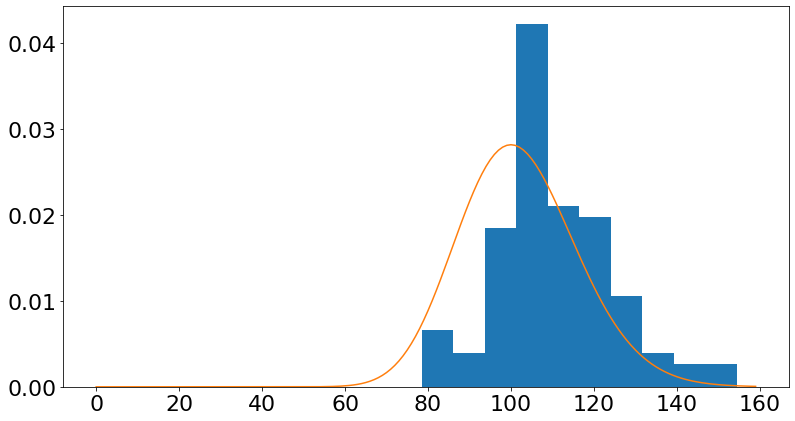

In [14]:
x=np.arange(0,160,1)
rv=scipy.stats.chi2(102)
plt.hist(df.chiSquaredStatistics, density=True);
plt.plot(x,rv.pdf(x));

## Exercise 1.02 ##
In this exercise we are required to sample different distribution via the inverse transform sampling and to verify the generalized central limit theorem for the sum of random variables extracted from a cauchy distribution, an exponential distribution and a uniform distribution.

The central limit theorems tells us that asymptotically, the mean of a set of variables extracted from a pdf $f(x)$ with tails in the form $x^{-\alpha-1}$ will be distributed according to a gauss distribution if $\alpha>2$, and will be distributed according to a set of distributions called levy-stable distribution if $\alpha<1$. It should be noted that if the tails are fat(i.e. $\alpha<2$) the the variance will diverge. $\alpha$ is called the stability parameter

In general the levy stable distributions don't have an analytical form, with few notable exception:
<ul>
  <li>The Cauchy distribution, with stability parameter $\alpha=1$:
    $$f(x)=\frac{1}{\pi\gamma}\frac{\gamma^2}{\gamma^2+(x-x_0)^2}$$</li>
  <li>The normal distribution, with stability parameter $2$</li>
</ul>

In the next section we will show the result of taking the mean of $N$ samples from three different pdfs, for 4 different values of $N$:1,2,10,100

In [15]:
df=pd.read_csv(".\inverseSampling\distributions.csv")
df.head(10)

,e1,c1,u1,e2,c2,u2,e10,c10,u10,e100,c100,u100,Unnamed: 12
0,0.130849,-1.691900,5,0.525306,0.375482,2.0,0.832064,-0.095159,0.4,1.098180,-0.003587,0.06,NaN
1,0.900785,-3.039810,2,0.268518,2.060720,2.5,1.670150,0.068645,0.5,1.126920,-0.025500,0.03,NaN
2,0.182466,-0.841827,6,0.881601,0.628055,0.5,0.778010,0.367926,0.5,1.067160,-0.004863,0.05,NaN
3,0.371433,0.508478,2,0.471746,-1.199010,2.5,0.824814,-0.246666,0.6,1.005380,0.010589,0.03,NaN
4,0.935728,-59.099200,1,0.528980,1.741320,1.0,1.137550,0.161005,0.1,0.924739,-0.025143,0.04,NaN
5,0.016343,-0.562374,5,1.142240,-0.142560,2.0,1.301120,-0.051375,0.1,1.050050,-0.029089,0.02,NaN
6,1.190210,-1.370800,5,0.297733,1.477200,2.5,0.823644,0.179275,0.5,0.945671,-0.016045,0.01,NaN
7,0.377919,0.051688,4,0.904819,-0.144520,1.5,1.863270,0.140423,0.3,1.087540,-0.014563,0.04,NaN
8,1.917210,0.398194,3,0.601158,-0.274216,0.5,1.028060,-0.045092,0.4,1.136510,0.008007,0.04,NaN
9,0.339108,0.708321,2,0.385049,-0.893020,3.0,1.036810,-0.444364,0.1,0.935986,0.023694,0.04,NaN


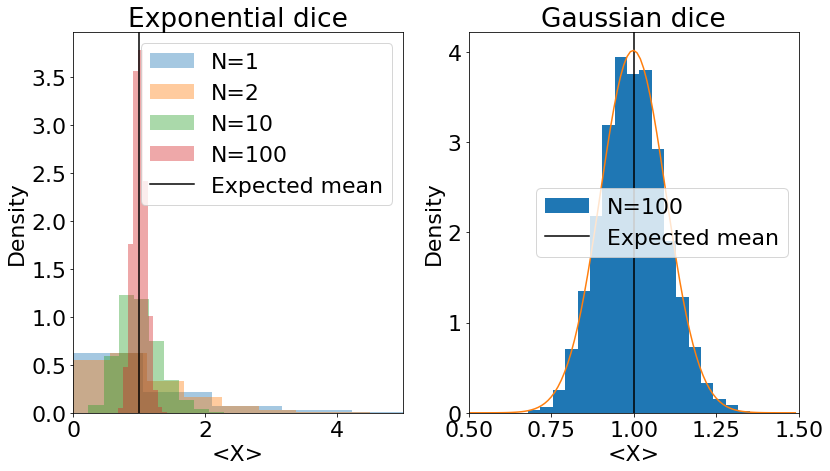

In [16]:
fig,ax=plt.subplots(1,2)
ax[0].hist(df.e1,density=True,alpha=0.4,label='N=1');
ax[0].hist(df.e2,density=True,alpha=0.4,label='N=2');
ax[0].hist(df.e10,density=True,alpha=0.4,label='N=10');
ax[0].hist(df.e100,density=True,alpha=0.4,label='N=100');
ax[0].axvline(1,color="black",label='Expected mean')
ax[0].set_ylabel('Density');
ax[0].set_xlabel('<X>');
ax[0].legend();
ax[0].set_title('Exponential dice')
ax[0].set_xlim([0,5]);

ax[1].hist(df.e100,density=True,alpha=1,label='N=100',bins=20);
ax[1].axvline(1,color="black",label='Expected mean')
ax[1].set_ylabel('Density');
ax[1].set_xlabel('<X>');
ax[1].legend();
ax[1].set_title('Gaussian dice')
ax[1].set_xlim([0.5,1.5]);
s = np.std(df.e100)
m = np.mean(df.e100)
s,m
ax[1].plot(np.arange(0.5,1.5,0.01),scipy.stats.norm.pdf(np.arange(0.5,1.5,0.01),m,s),label='gaussiana')

The histogram of a Cauchy distribution, on the other hand, is a bit harder to see: it's a fat-tailed distribution, so the values could span different order of magnitudes: the visualization can become problematic. A way around this is the choice of a log scale for both the x and y axis, and if we have:
$$y\approx \frac{1}{x^{2}}$$
we have:
$$\log(y)\approx -2\log(x)$$
With this choice of the axis the distribution is a straight line.

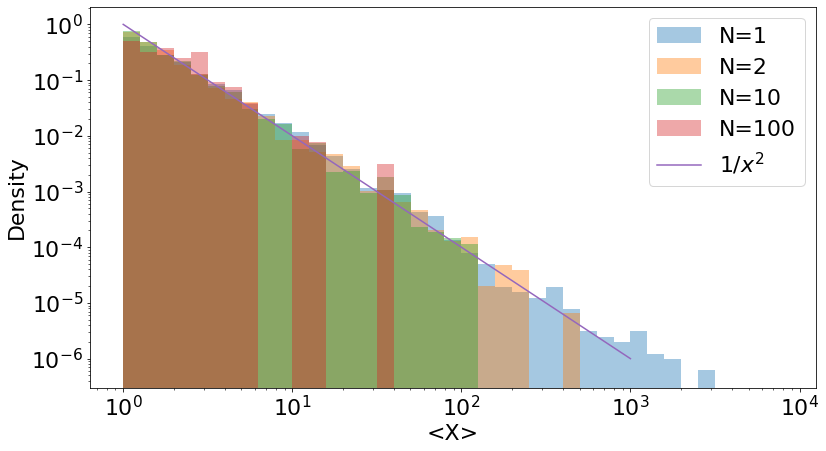

In [17]:
plt.xscale('log');
plt.yscale('log');
plt.hist(df.c1,density=True,alpha=0.4,bins = 10**(np.arange(0,4,0.1)),label='N=1');
plt.hist(df.c2,density=True,alpha=0.4,bins = 10**(np.arange(0,4,0.1)),label='N=2');
plt.hist(df.c10,density=True,alpha=0.4,bins = 10**(np.arange(0,4,0.1)),label='N=10');
plt.hist(df.c100,density=True,alpha=0.4,bins = 10**(np.arange(0,4,0.1)),label='N=100');
plt.plot(np.arange(1,1e3,1),(np.arange(1,1e3,1))**(-2),label=r'$1/x^{2}$');
plt.ylabel('Density');
plt.xlabel('<X>');
plt.legend();

We can observe that the distribution is the same, and the only difference lies in the size of the extreme values.

# Esercizio 1.03 #
In this exercise we are required to estimate the value of Pi by simulating the throw of a needle of length $l$ on an equispaced grid with spacing $d$.
To do so we can generate the $x$ and $y$ coordinates of a point inside the unit circle using the hit-and-miss method, we rescale the vector by $l/(x^2+y^2)$and we translate it by a vector $(x_t,y_t)$. $x_t$ and $y_t$ are uniformlly distributed in $(-x/2,d-x/2)$

While this method may seems a bit contrived, it doesn't use the value of $\pi$, which is a desirable feature for a program designed to estimate $\pi$ 
Here we estimated the value of $\pi$ using 100 blocks of 10000 throws each, and in the next block we plot the results for the progressive mean and the statistical error and a sample of the needles thrown.

In [23]:
df=pd.read_csv(r".\buffonNeedle\buffon.csv")
df.head(10)

,piEstimate,error
0,3.14367,0.000000
1,3.11695,0.026715
2,3.13852,0.026521
3,3.13710,0.018807
4,3.12735,0.017532
5,3.11549,0.018585
6,3.13036,0.021628
7,3.13030,0.018731
8,3.13179,0.016586
9,3.12917,0.015064


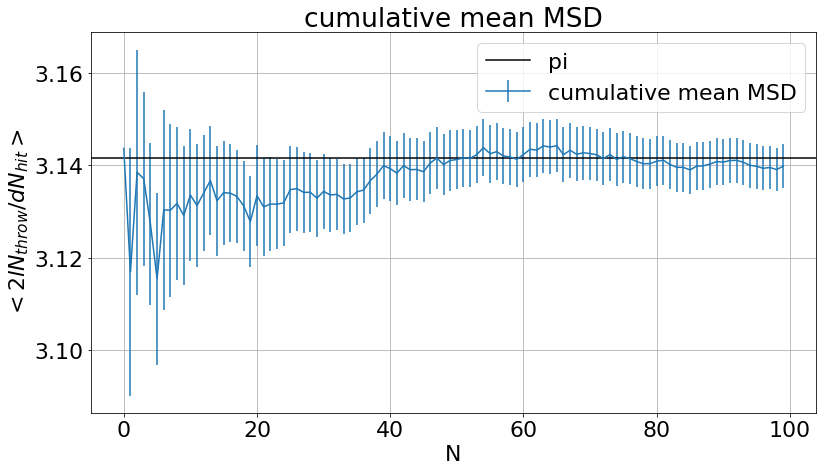

In [25]:
N=df.piEstimate.size;
plt.errorbar(x=range(N), y=df.piEstimate, yerr=df.error, label="cumulative mean MSD");
plt.axhline(math.pi,color="black", label='pi');
plt.xlabel("N");
plt.ylabel(r"$<2lN_{throw}/dN_{hit}>$");
plt.title("cumulative mean MSD");
plt.grid()
plt.legend();

In [26]:
df=pd.read_csv(r".\buffonNeedle\needles.csv")
df.head(10)

,xstart,ystart,xend,yend,crossing
0,0.551382,1.439840,1.357080,0.847503,0
1,1.090140,2.259030,1.533940,1.362910,0
2,1.730440,-0.424836,1.373750,0.509386,0
3,1.046950,0.985029,0.069981,1.198400,0
4,0.622023,1.424400,-0.363452,1.594220,1
5,1.314640,1.889310,0.658264,1.134880,0
6,0.997871,0.611184,0.033703,0.345889,0
7,1.391220,0.686424,1.076020,1.635450,0
8,1.370060,1.238700,1.373960,0.238705,0
9,1.122260,0.638026,1.591260,-0.245168,0


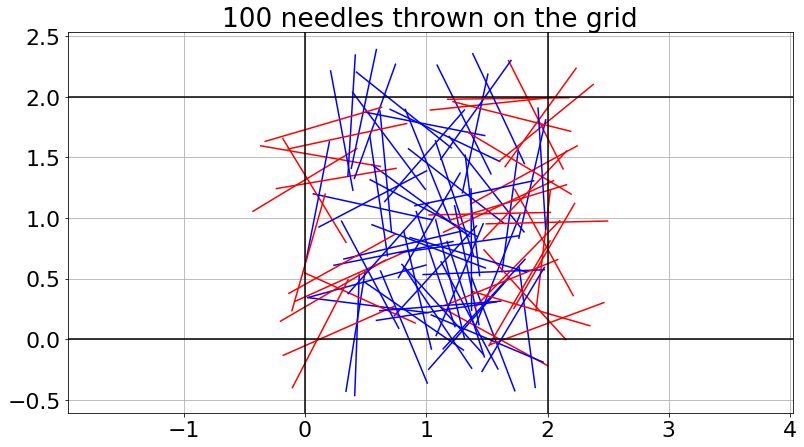

In [27]:
N=100
for i in range(N):
    if(df.crossing[i]==0):
        color='blue'
    else:
        color='red'
    plt.plot((df.xstart[i],df.xend[i]),(df.ystart[i],df.yend[i]),color=color)

plt.axhline(0,color="black");
plt.axvline(0,color="black");
plt.axhline(2,color="black");
plt.axvline(2,color="black");
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.axis('equal')
plt.title(f'{N} needles thrown on the grid')
plt.grid()